# A Notebook to iterate through a set of training CSV's and train a recog head for a 128 dim embeddor model, evaluate recognition, and save results to a line in a csv

In [1]:
# ---- Necessary Imports

import yaml
import os
from glob import glob
import os
import pandas as pd
import json
import pickle
import numpy as np

## Correct filepaths in csvs (if needed)


In [2]:

directory = '/home/gsantiago/all_data_csvs/closed*'
# # closed_set_directory = '/home/gsantiago/summer_bee_data/closed_test_'
# closed_test = "/home/gsantiago/summer_bee_data/closed_test_"
#file_to_replace = "/home/gsantiago/summer_bee_data/summer_bee_data/"
#file_destination = "/home/gsantiago/move_andrea_to_split/summer_bee_data/"

for path in glob(directory):
    print(path)
    csv_directory = path+'/*'

    for csv in glob(csv_directory):
        #print(csv)
        csv_frame = pd.read_csv(csv)
        #print(csv_frame.head())
        csv_frame['filepath']=csv_frame['filepath'].apply(lambda x: x.replace(file_to_replace,file_destination))
        print(csv_frame.head())
       # csv_frame.to_csv(csv, index=False)
open_sets_directory = '/home/gsantiago/all_data_csvs/open_sets/*'
for path in glob(open_sets_directory):

    #print(path)
    csv_directory = path+'/*'
    
    for csv in glob(csv_directory):
        print(csv)
        csv_frame = pd.read_csv(csv)
        print(csv_frame.head())
        csv_frame['filepath']=csv_frame['filepath'].apply(lambda x: x.replace(file_to_replace,file_destination))
       # csv_frame.to_csv(csv, index=False)

# for data_setting in config['data_settings']['datafiles'].values():
    
#     if(data_setting is None):
#         continue
#     csv_frame = pd.read_csv(data_setting)
    
#     print(csv_frame)
#     csv_frame['filepath']=csv_frame['filepath'].apply(lambda x: x.replace('/home/gsantiago/move_andrea_to_split/summer_bee_data','/home/gsantiago/move_andrea_to_split/summer_bee_data/') )
    
#     csv_frame.to_csv(data_setting, index=False)


# Iterate through training files

### Specify Training and Evaluation Files 
This method iterates through a folder of training csvs and evaluates them on the same test (query) file using the same reference file each time. 

In [2]:
#dir containing training csvs to start working with 
dir = '/home/gsantiago/summer_bee_data/open_sets/new_open_max_ids_batch2'

test_file = '/home/gsantiago/summer_bee_data/open_sets/open_max_ids_batch1/summer_bee_dataset_open_train_bee_balanced_batch1_sample_num_max.csv'
#test on all of batch 2 (open set) gonna also test on all of batch 1 

#valid_file = '/home/gsantiago/summer_bee_data/closed_sets_max_ids_batch1/summer_bee_dataset_closed_train_bee_balanced_sample_num_2.csv'
# run valid on smaller subset of test_set to speed training 

#reference knn on smaller subset of batch 1
#reference_file = '/home/gsantiago/summer_bee_data/closed_sets_max_ids_batch1/summer_bee_dataset_closed_train_bee_balanced_sample_num_2.csv'


results_file = './results_tracking.csv'

file_paths = []

#### Get list of training files

In [2]:
dir = '/home/gsantiago/summer_bee_data/open_sets/new_open_max_ids_batch2'
test_file = '/home/gsantiago/summer_bee_data/open_sets/open_max_ids_batch1/summer_bee_dataset_open_train_bee_balanced_batch1_sample_num_max.csv'
file_paths = []

# Get file list 
for root, dirs, files in os.walk(dir):
    files = files
for f in files:
    print(root+r'/'+f)
    train_file = root+r'/'+f
    file_paths.append(train_file)
#     continue

#files.sort()

/home/gsantiago/summer_bee_data/open_sets/new_open_max_ids_batch2/summer_bee_dataset_open_train_bee_64_ids_batch2_sample_num_02.csv
/home/gsantiago/summer_bee_data/open_sets/new_open_max_ids_batch2/summer_bee_dataset_open_train_bee_64_ids_batch2_sample_num_32.csv
/home/gsantiago/summer_bee_data/open_sets/new_open_max_ids_batch2/summer_bee_dataset_open_train_bee_64_ids_batch2_sample_num_64.csv
/home/gsantiago/summer_bee_data/open_sets/new_open_max_ids_batch2/summer_bee_dataset_open_train_bee_64_ids_batch2_sample_num_16.csv
/home/gsantiago/summer_bee_data/open_sets/new_open_max_ids_batch2/summer_bee_dataset_open_train_bee_64_ids_batch2_sample_num_max.csv
/home/gsantiago/summer_bee_data/open_sets/new_open_max_ids_batch2/summer_bee_dataset_open_train_bee_64_ids_batch2_sample_num_04.csv
/home/gsantiago/summer_bee_data/open_sets/new_open_max_ids_batch2/summer_bee_dataset_open_train_bee_64_ids_batch2_sample_num_08.csv


In [ ]:
#IF setting two folders to train at once: 

# dir2 = '/home/gsantiago/summer_bee_data/closed_sets_8_ids_monocolor_batch2'
# files2 = []
# for root2, dirs2, files2 in os.walk(dir2):
#     files2 = files2
# for f2 in files2:
#     #print(root+r'/'+f2)
#     train_file2 = root2+r'/'+f2
#     file_paths.append(train_file2)
# #     continue

# print(file_paths)

## Loop through files, train and eval model

Code may need to be modified for differnt training sets such as
* run_str parsing to include important variables such as num_ids
* the path to your template yml config file
*

In [ ]:
train_file_dirs = ['/home/lmeyers/summer_bee_data_reextract/new_open_max_ids_batch1','/home/lmeyers/summer_bee_data_reextract/new_open_max_ids_batch2']

#TODO need to do for each embeddor batch too!
#embeddors = ["/home/gsantiago/ReID_model_training/new_auto_train_eval/models_trained/summer_bee_dataset_open_train_bee_64_ids_batch1_sample_num_64/wandb/run-20231106_004425-yida7voj/files/summer_bee_dataset_open_train_bee_64_ids_batch1_sample_num_64.pth"]

for i in range(len(train_file_dirs)):
    if i == 0:
        test_file = '/home/lmeyers/summer_bee_data_reextract/new_open_max_ids_batch2/summer_bee_dataset_open_train_bee_64_ids_batch2_sample_num_max.csv'
    else:
        test_file = '/home/lmeyers/summer_bee_data_reextract/new_open_max_ids_batch1/summer_bee_dataset_open_train_bee_64_ids_batch1_sample_num_max.csv'
    
    dir = train_file_dirs[i]
    file_paths = []

    # Get file list 
    for root, dirs, files in os.walk(dir):
        files = files
    for f in files:
        print(root+r'/'+f)
        train_file = root+r'/'+f
        file_paths.append(train_file)
    #     continue

    # If testing multiple lengths of training, add multiple #'s to epochs_to_test
    epochs_to_test = [0.5]

    #Loops through number of epochs
    for n in epochs_to_test: 
        #Loops through files
        for i in range(len(file_paths)):
            train_file = file_paths[i] #train file path
            wandb_name = os.path.basename(os.path.dirname(train_file)) #set wandb_dir_name

            #------------ Initilize and make new dir for each training set-----

            # Saves wandb folder, checkpoints, and outputs to folder named based on run string, which should contain attrs that differntiate run
            run_str = os.path.basename(train_file)[34:-4] #MAY NEED TO MODIFY BASED ON CSV NAME
            run_dir_name = run_str+'/'
            if not os.path.exists(run_dir_name):
                os.mkdir(run_dir_name)
            split_parts = run_str.rsplit('_', 1) #String parse csv name
            if len(split_parts) > 1: # Check if there is at least one underscore in the string
                # Get the substring after the last underscore
                num_images = split_parts[1]
                num_ids = split_parts[0][:2]
            else:
                # Handle the case where there are no underscores in the string
                num_images = run_str

            ##----------------Filter particular runs (if needed)----------
            #if num_images == 'max':

            ##---------- Initilize new config .yml for new training file---------------

            #open config yaml to update experiment params
            with open('pytorch_train_and_eval_recog.yml', 'r') as fo:
                config = yaml.safe_load(fo)

            #Update params
            config['model_settings']['num_labels']= run_str[0]
            print('Num labels ',run_str[0])

            #Check if batch size needs to be updated
            df = pd.read_csv(train_file)
            if config['data_settings']['batch_size'] > len(df):
                config['data_settings']['batch_size'] = len(df)
                print('Updated batch to contain all Data. Size = ',len(df))

            #Check if print_k needs to be updated for small dataset
            print_k = config['train_settings']['print_k']
            if print_k > len(df)/config['data_settings']['batch_size']:
                print_k = len(df)/config['data_settings']['batch_size']
                config['train_settings']['print_k'] = print_k
                print('Updating print_k to contain whole epoch. Num_batches =',print_k)

            #Testing a differnt num of epochs based on loop
            config['train_settings']['num_epochs'] = 150
            config['train_settings']['percent_pos'] = n 

            #updating datafiles
            config['data_settings']['datafiles']['train']=train_file
            #config['data_settings']['datafiles']['reference']= reference_file

            #config['data_settings']['datafiles']['train']=train_csv
            config['data_settings']['datafiles']['test'] = test_file
            #config['data_settings']['datafiles']['valid']= valid_file 
            config['data_settings']['datafiles']['query']= test_file

            #update Model path
            config['model_settings']['model_path'] = './'+run_dir_name+run_str+'.pth'

            #update pickle_file to prevent being overwritten
            pickle_file = './'+run_dir_name+'results.pkl'
            config['eval_settings']['pickle_file'] = pickle_file

            #update wandb_project_name
            config['train_settings']['wandb_project_name'] = 'recog_'+wandb_name
            config['train_settings']['wandb_dir_path'] = run_dir_name #this should make a seperate wandb folder for runs

            #save yml
            new_yml_file = './'+run_dir_name+run_str+'.yml'
            with open(new_yml_file, 'w') as fo:
                    yaml.dump(config,fo)   

            #---------- actually run training too--------------
            !python pytorch_train_and_eval_recognition.py --config_file {new_yml_file}

            # Save model to wandb file location to prevent overwriting
            # new dir in wandb/ will be generated each training run
            !cp {config['model_settings']['model_path']} {config['train_settings']['wandb_dir_path']+'/wandb/latest-run/files/'+os.path.basename(config['model_settings']['model_path'])}

            # read python results from pickle file, 
            with open(config['eval_settings']['pickle_file'],'rb') as fi:
                results = pickle.load(fi)  

            # Write out run summary to results tracking document

            results_dict = {'run_str': run_str,
                                                'wandb_id':results['wandb_id'],
                                                'num_ids':num_ids,
                                                'num_images_per_id':num_images,
                                                'total_training_images':results['train_num'],
                                                'batch_size':config['data_settings']['batch_size'],
                                                'num_epochs':config['train_settings']['num_epochs'],
                                                'train_loss':results['train_loss'],
                                                'valid_accuracy':results['valid_accuracy'],
                                                'training_file':train_file,
                                                'test_file':test_file,
                                                'accuracy': results['accuracy'],
                                                'precision':results['precision'],
                                                'recall':results['recall'],
                                                'start_time':results['start_time'],
                                                'train_time':results['train_time'],
                                                'stop_epoch':results['stop_epoch'],
                                                'model_class':config['model_settings']['model_class'],
                                                'embedder_path':config['model_settings']['embeddor_path'],
                                                'early_stopping_metric':config['train_settings']['early_stopping_metric'],
                                                'eval_percent_positive':results['eval_positive_prob'],
                                                'train_percent_positive':results['train_positive_prob'],
                                                'roc_auc':results['roc_auc']}

            #initilize file if nonexisttant or empty 
            if not os.path.exists(config['eval_settings']['results_file']):
                !touch {config['eval_settings']['results_file']}
                results_df = pd.DataFrame(results_dict,index=[0])
                results_df.to_csv(config['eval_settings']['results_file'])
            else:
                #read df and append row
                results_df = pd.read_csv(config['eval_settings']['results_file'])
                results_df.loc[len(results_df)] = results_dict
                results_df.to_csv(config['eval_settings']['results_file'],index=False)


/home/lmeyers/summer_bee_data_reextract/new_open_max_ids_batch1/summer_bee_dataset_open_train_bee_64_ids_batch1_sample_num_16.csv
/home/lmeyers/summer_bee_data_reextract/new_open_max_ids_batch1/summer_bee_dataset_open_train_bee_64_ids_batch1_sample_num_02.csv
/home/lmeyers/summer_bee_data_reextract/new_open_max_ids_batch1/summer_bee_dataset_open_train_bee_64_ids_batch1_sample_num_04.csv
/home/lmeyers/summer_bee_data_reextract/new_open_max_ids_batch1/summer_bee_dataset_open_train_bee_64_ids_batch1_sample_num_64.csv
/home/lmeyers/summer_bee_data_reextract/new_open_max_ids_batch1/summer_bee_dataset_open_train_bee_64_ids_batch1_sample_num_max.csv
/home/lmeyers/summer_bee_data_reextract/new_open_max_ids_batch1/summer_bee_dataset_open_train_bee_64_ids_batch1_sample_num_32.csv
/home/lmeyers/summer_bee_data_reextract/new_open_max_ids_batch1/summer_bee_dataset_open_train_bee_64_ids_batch1_sample_num_08.csv
Num labels  6
2024-03-18 14:22:14.524481: I tensorflow/core/platform/cpu_feature_guard.cc

  1%|          | 2/298 [00:00<01:11,  4.13it/s]100%|██████████| 298/298 [01:02<00:00,  4.79it/s]


Accuracy: 0.95
Precision: 0.92
Recall: 0.99
0.9957727389126741


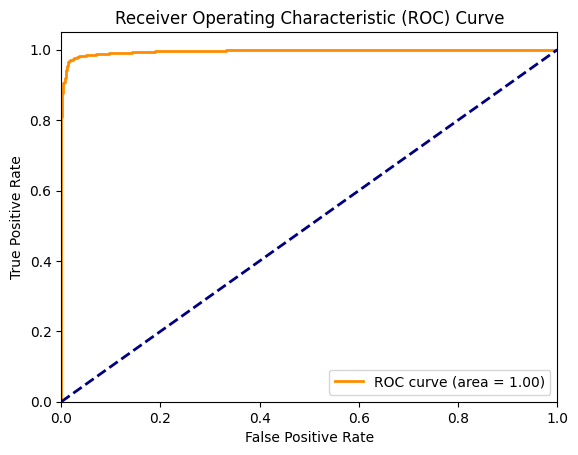

In [7]:
## Code for running seperate evaluation

import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from pytorch_train_and_eval_recognition import Flowerpatch_Pairs, RecogModel
import sys
sys.path.insert(1, '/home/lmeyers/beeid_clean_luke/PYTORCH_CODE/')
sys.path.insert(2, '/home/lmeyers/beeid_clean_luke/KEY_CODE_FILES/')
from data import prepare_for_triplet_loss
import torch.nn as nn 
from tqdm import tqdm


#load embedder and classifier 
emb_path = '/home/gsantiago/ReID_model_training/new_auto_train_eval/models_trained/summer_bee_dataset_open_train_bee_64_ids_batch1_sample_num_64/wandb/run-20231106_004425-yida7voj/files/summer_bee_dataset_open_train_bee_64_ids_batch1_sample_num_64.pth'
model_name = os.path.basename(emb_path)
embedder = torch.load(emb_path) #TODO look into graph mode for pytorch, embeddor being duplicated 
#embedder.eval()

model = RecogModel()
model_dict = torch.load("/home/lmeyers/tranf_recog/64_ids_batch2_sample_num_64/_ids_batch2_sample_num_64.pth")
model.load_state_dict(model_dict)

#Define the cross-entropy loss function
loss_fn = nn.BCEWithLogitsLoss() #More stable, 

image_size = (256,256)
bs = 32

#Test dataloader 
fname = test_file
dft = pd.read_csv(fname)
dft = prepare_for_triplet_loss(dft, 'ID', 'filepath')

# Build test dataset and dataloader
test_dataset = Flowerpatch_Pairs(dft, 'filename', 'label',image_size,'test')
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=bs, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
embedder.to(device)

#---- perform evaluation

model.eval()

# Forward pass through the classifier
with torch.no_grad():
    test_binary_preds = np.empty((0,))
    test_logits_preds = np.empty((0,))
    test_truth = np.empty((0,))
    for test_batch_idx, data in tqdm(enumerate(test_dataloader), total=len(test_dataloader)):
        test_features = data['image']
        test_pairs = data['pair']
        test_labels = data['label'].to(device)

        # get embeddings of img pair
        test_reference = embedder(test_features.to(device))
        test_query = embedder(test_pairs.to(device))
    
        # Pass through model
        test_outputs = model(test_reference,test_query) #calling model vs calling forward (check understanding)
        test_logits = test_outputs.squeeze()

        test_outputs = torch.sigmoid(test_outputs)
        test_outputs = test_outputs.squeeze() #
        
        # Calculate the predicition loss
        test_loss = loss_fn(test_outputs, test_labels)
       
        #____ test outputs (i forgot the word)
        test_outputs = test_outputs.detach().cpu().numpy()
        test_logits = test_logits.detach().cpu().numpy()
        test_outputs = (test_outputs>=0.5).astype(int)

        test_truth = np.concatenate((test_truth, test_labels.detach().cpu().numpy()))
        test_binary_preds = np.concatenate((test_binary_preds,test_outputs)) #TODO fix this one too to prevent truncation
        test_logits_preds = np.concatenate((test_logits_preds,test_logits))

# Convert to PyTorch tensors (if not already)
conf = confusion_matrix(test_truth,test_binary_preds)

accuracy = accuracy_score(test_truth,test_binary_preds)
precision = precision_score(test_truth,test_binary_preds)
recall = recall_score(test_truth,test_binary_preds)
    
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

#calculate roc curve and plot
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_true and y_score are your ground truth labels and predicted scores respectively
fpr, tpr, _ = roc_curve(test_truth,test_logits_preds)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## If folder contains csvs from both batches: run below code

In [ ]:
# if you want only train on batch1, add the string after the asterisk
#here im training on 32 ids batch1
directory_of_csvs ='/home/gsantiago/summer_bee_data/open_sets/new*04*batch1'

sample_num_of_interest = "sample_num_"

#this variable is for creating a folder that will contain the files we want
type_of_train_wanted = '/home/gsantiago/ReID_model_training/new_auto_train_eval/models_trained/'
#type_of_train_wanted = '/home/lmeyers/ReID_complete/few_shot_experiments/new_training_models/'

#wandb_dir_name is the directory where eveything wandb saves or whatevah
wandb_dir_name = "/home/gsantiago/ReID_model_training/new_auto_train_eval/models_trained/"

results_pickle="/home/gsantiago/ReID_model_training/new_auto_train_eval/"

csv_for_results = "/home/gsantiago/ReID_model_training/new_auto_train_eval/Few_shot_expirament_results_tracking.csv"
epochs_to_test = [1500]
label_col = 'reID'
gpu_id = '1'



## optional!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
## REMOVE LATER


non_trained_models=[

# '/home/gsantiago/summer_bee_data/open_sets/new_open_04_ids_all_colors_batch1/summer_bee_dataset_open_train_bee_4_ids_batch1_sample_num_16.csv',

'/home/gsantiago/summer_bee_data/open_sets/new_open_04_ids_all_colors_batch1/summer_bee_dataset_open_train_bee_4_ids_batch1_sample_num_32.csv',

'/home/gsantiago/summer_bee_data/open_sets/new_open_04_ids_all_colors_batch1/summer_bee_dataset_open_train_bee_4_ids_batch1_sample_num_64.csv'

]
if not os.path.exists(type_of_train_wanted):
    os.mkdir(type_of_train_wanted)



for n in epochs_to_test:
    #loops through every file that starts with that string
    for split in glob(directory_of_csvs):
        #print(split)
        
        #get number of batch to reference and test on the other
        
        batch = split.split('_')[-1]
        #print(batch)
        #print(os.path.dirname(split))
        parent_dir = os.path.dirname(split)
        
        if batch == "batch1":
            query_file = parent_dir +'/open_reference_query_testing_batch2/summer_bee_dataset_closed_test_bee_query_64_ids_batch2.csv'
            reference_file = parent_dir +'/open_reference_query_testing_batch2/summer_bee_dataset_closed_test_bee_reference_64_ids_batch2.csv'
            valid_file = parent_dir +'/open_reference_query_testing_batch2/summer_bee_dataset_closed_test_bee_valid_64_ids_batch2.csv'
        else:
            query_file = parent_dir +'/open_reference_query_testing_batch1/summer_bee_dataset_closed_test_bee_query_64_ids_batch1.csv'
            reference_file = parent_dir +'/open_reference_query_testing_batch1/summer_bee_dataset_closed_test_bee_reference_64_ids_batch1.csv'
            valid_file = parent_dir +'/open_reference_query_testing_batch1/summer_bee_dataset_closed_test_bee_valid_64_ids_batch1.csv'
        split +='/*'+sample_num_of_interest+'*'
        
        
        
        

        #this loops through each directory and takes the csv with the sample num of interest
        # if you want to loop through every sample num, sample_num should be "sample_num"
        for csv in glob(split):
            if csv not in non_trained_models:
                print(csv)
                continue
            
            
            

            train_file = csv
            wandb_name = os.path.basename(os.path.dirname(train_file))
            run_str = os.path.basename(train_file)[:-4]
            run_dir_name = type_of_train_wanted+run_str+'/'
            #print(wandb_name)
            if not os.path.exists(run_dir_name):
                os.mkdir(run_dir_name)
            #print(run_dir_name)




            split_parts = train_file.split('/')[-1].split('_')
            #print(split_parts)
            # Check if there is at least one underscore in the string
            if len(split_parts) > 1:
                # Get the substring after the last underscore
                num_images = split_parts[-1].replace('.csv', '')
                num_ids = split_parts[6]
            else:
                # Handle the case where there are no underscores in the string
                num_images = run_str

            print(num_images, num_ids)

             #open config yaml to update experiment params
            with open('./reid_template.yml', 'r') as fo:
                config = yaml.safe_load(fo)

            #Update params

            #num labels should be taken from pandas because batch1!=batch2

            df = pd.read_csv(train_file)
            num_labels = df['ID'].nunique()

            config['model_settings']['num_labels']= num_labels
            
            
            #ubdating label_col
            config['data_settings']['label_col']=  label_col
            
            #gpu
            config['train_settings']['gpu'] = gpu_id
            print('Num labels ',num_labels)

            #Check if batch size needs to be updated

            config['data_settings']['batch_size'] = 64
            if config['data_settings']['batch_size'] > len(df):
                config['data_settings']['batch_size'] = len(df)
                print('Updated batch to contain all Data. Size = ',len(df))

            #Check if print_k needs to be updated for small dataset
            print_k = config['train_settings']['print_k']
            if print_k > len(df)/config['data_settings']['batch_size']:
                print_k = len(df)/config['data_settings']['batch_size']
                config['train_settings']['print_k'] = print_k
                print('Updating print_k to contain whole epoch. Num_batches =',print_k)

            #Testing a differnt num epochs (EXPIRAMENT HERE)
            config['train_settings']['num_epochs'] = n

            #updating datafiles
            config['data_settings']['datafiles']['train']=train_file
            config['data_settings']['datafiles']['reference']= reference_file


            #config['data_settings']['datafiles']['train']=train_csv
            config['data_settings']['datafiles']['test'] = query_file
            config['data_settings']['datafiles']['valid']= valid_file 
            config['data_settings']['datafiles']['query']= query_file

            #update Model path
            config['model_settings']['model_path'] = run_dir_name+run_str+'.pth'

            #update wandb_project_name
            config['train_settings']['wandb_project_name'] = wandb_name
            config['train_settings']['wandb_dir_path'] = wandb_dir_name + run_str #this should make a seperate wandb folder for runs
            
            #pickle_config_file
            config['eval_settings']['pickle_file'] = results_pickle+ 'results.pkl'
            config['eval_settings']['results_file']= csv_for_results
            
#             #"""
#             #skipping max because I already ran it
#             if num_images not in [64, '64'] and 'monocolor' not in run_str:
#                 print('Skipping')
#                 continue
#             #"""

            #save yml
            new_yml_file = run_dir_name+run_str+'.yml'
            with open(new_yml_file, 'w') as fo:
                    yaml.dump(config,fo)   

            #---------- actually run training too--------------
            !python3 pytorch_train_and_eval_reid_2.py --config_file {new_yml_file}

            # Save model to wandb file location to prevent overwriting
            !cp {config['model_settings']['model_path']} {config['train_settings']['wandb_dir_path']+'/wandb/latest-run/files/'+os.path.basename(config['model_settings']['model_path'])}

            with open(config['eval_settings']['pickle_file'],'rb') as fi:
                results = pickle.load(fi)  

            # Write out run summary to results tracking document
            results_df = pd.read_csv(config['eval_settings']['results_file'])
            results_df.loc[len(results_df)] = {'run_str': run_str,
                                                'wandb_id':results['wandb_id'],
                                                'num_ids':num_ids,
                                                'num_images_per_id':num_images,
                                                'total_training_images':len(pd.read_csv(train_file)),
                                                'batch_size':config['data_settings']['batch_size'],
                                                'num_epochs':config['train_settings']['num_epochs'],
                                                'train_loss':results['train_loss'],
                                                'valid_loss':results['valid_loss'],
                                                '1NN':results['1NN_acc'],
                                                '3NN':results['3NN_acc'],
                                                'training_file':train_file,
                                                'reference_file':reference_file,
                                                'query_file':query_file,
                                                'start_time':results['start_time'],
                                                'train_time':results['train_time'],
                                                'stop_epoch':results['stop_epoch']}
            results_df.to_csv(config['eval_settings']['results_file'],index=False)




    



/home/gsantiago/summer_bee_data/open_sets/new_open_04_ids_all_colors_batch1/summer_bee_dataset_open_train_bee_4_ids_batch1_sample_num_max.csv
/home/gsantiago/summer_bee_data/open_sets/new_open_04_ids_all_colors_batch1/summer_bee_dataset_open_train_bee_4_ids_batch1_sample_num_16.csv
/home/gsantiago/summer_bee_data/open_sets/new_open_04_ids_all_colors_batch1/summer_bee_dataset_open_train_bee_4_ids_batch1_sample_num_04.csv
32 4
Num labels  4
Updating print_k to contain whole epoch. Num_batches = 2.0
2023-11-07 12:46:49.642816: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-07 12:46:50.547058: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
finished imports
beginning execution
wandb: Currently logged i

#### In event of run failure to record automatically
Use below code to save run details from results.pickle even if there was an issue in your run

In [5]:

with open(config['eval_settings']['pickle_file'],'rb') as fi:
    results = pickle.load(fi)   

# Write out run summary to results tracking document
results_df = pd.read_csv(config['eval_settings']['results_file'])
results_df.loc[len(results_df)] = {'run_str': run_str,
                                    'wandb_id':results['wandb_id'],
                                    'num_ids':num_ids,
                                    'num_images_per_id':num_images,
                                    'total_training_images':len(pd.read_csv(train_file)),
                                    'batch_size':config['data_settings']['batch_size'],
                                    'num_epochs':config['train_settings']['num_epochs'],
                                    'train_loss':results['train_loss'],
                                    'valid_loss':results['valid_loss'],
                                    '1NN':results['1NN_acc'],
                                    '3NN':results['3NN_acc'],
                                    'training_file':train_file,
                                    'reference_file':reference_file,
                                    'query_file':query_file,
                                    'start_time':results['start_time'],
                                    'train_time':results['train_time'],
                                    'stop_epoch':results['stop_epoch']}
results_df.to_csv(config['eval_settings']['results_file'],index=False)

